Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2025./2026.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2026 Jan Šnajder, Domagoj Alagić 

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
fi_X = PolynomialFeatures(degree=1).fit_transform(X)
print(fi_X)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Vaš kôd ovdje
w_linalg = linalg.inv(fi_X.T @ fi_X) @ fi_X.T @ y
w_pinv = linalg.pinv(fi_X) @ y

print(f"Klasično:\t{w_linalg}\nPseudoinverz:\t{w_pinv}\nRazlika:\t{w_linalg - w_pinv}")

Klasično:	[2.2        0.45714286]
Pseudoinverz:	[2.2        0.45714286]
Razlika:	[ 8.88178420e-16 -2.22044605e-16]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [5]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
y_pred = fi_X @ w_pinv.T

mse = mean_squared_error(y, y_pred)
err = 0.5 * (sum((y-y_pred)**2))

print(f"MSE:\t{mse}\nERR:\t{err}")

MSE:	2.042857142857143
ERR:	4.085714285714286


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje
try:
    w_tinv = linalg.inv(fi_X) @ y
except:
    print("Obični inverz ne može")
    pass

new_fi_X = PolynomialFeatures(degree=3).fit_transform(X)
print(f"New fi_X:\n{new_fi_X}")
w_tinv = linalg.inv(new_fi_X) @ y
print(f"New weights:\t{w_tinv}")



Obični inverz ne može
New fi_X:
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
New weights:	[ 4.         -5.91666667  3.375      -0.45833333]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
model = LinearRegression().fit(X, y)
print(f"Interc.:\t{model.intercept_}\nCoef.:\t{model.coef_}")
print(f"W_pinv:\t{w_pinv}")

Interc.:	2.2
Coef.:	[0.45714286]
W_pinv:	[2.2        0.45714286]


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    y = []
    for x in X:
        y.append(f(x[0]) + normal(0, noise))
    return y

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 50)
Y = make_labels(X, lambda x: 5+ x - 2*(x**2) - 5*(x**3), 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

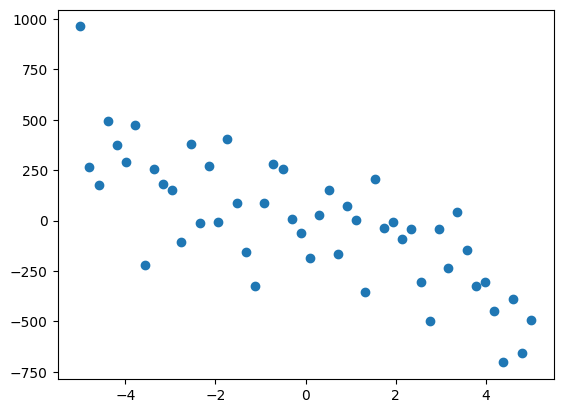

In [11]:
# Vaš kôd ovdje
plt.scatter(X, Y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

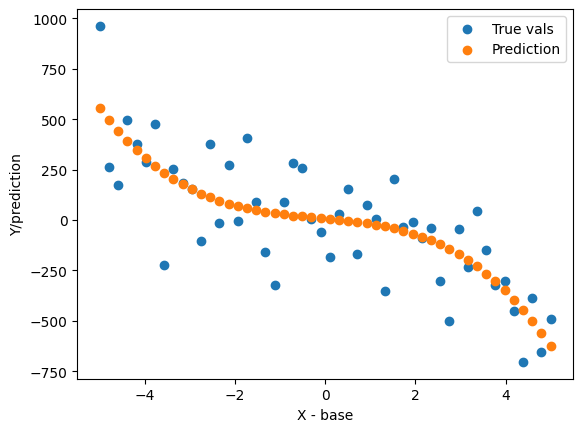

In [12]:
# Vaš kôd ovdje
X_new = PolynomialFeatures(3).fit_transform(X)
model = LinearRegression().fit(X_new, Y)
h = model.predict(X_new)

def modelErr(t,p, prnt=False):
    er = sum((p-t)**2)*.5
    if prnt:
        print(f"Error: {round(er, 2)}")
    return er

modelErr(Y, h)
plt.scatter(X, Y, label="True vals")
plt.scatter(X, h, label="Prediction")

plt.ylabel("Y/prediction")
plt.xlabel("X - base")
plt.legend()
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

For degree=1:
Error: 1060492.27
--------------------------
For degree=3:
Error: 902357.31
--------------------------
For degree=5:
Error: 880019.58
--------------------------
For degree=10:
Error: 784799.64
--------------------------
For degree=20:
Error: 628329.4
--------------------------


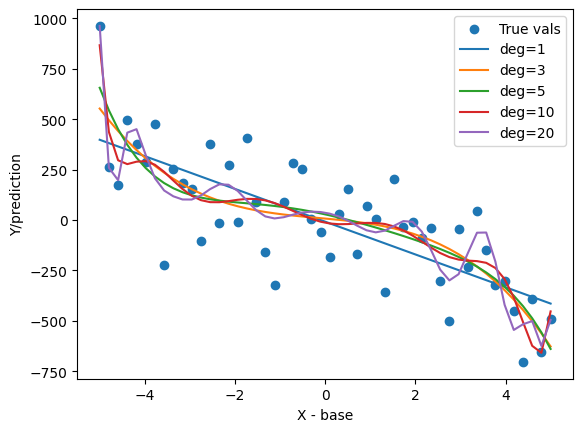

In [13]:
# Vaš kôd ovdje
deg = [1, 3, 5, 10, 20]

plt.scatter(X, Y, label="True vals")

for d in deg:
    X_poly = PolynomialFeatures(d).fit_transform(X)
    model = LinearRegression().fit(X_poly, Y)
    h = model.predict(X_poly)
    plt.plot(X, h, label=f"deg={d}")
    print(f"For degree={d}:")
    modelErr(Y, h, True)
    print("--------------------------")

plt.ylabel("Y/prediction")
plt.xlabel("X - base")
plt.legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

For degree=1:
Train:
Error: 560862.44
Test:
Error: 658661.4
--------------------------
For degree=2:
Train:
Error: 548615.4
Test:
Error: 677332.89
--------------------------
For degree=3:
Train:
Error: 493846.29
Test:
Error: 545412.01
--------------------------
For degree=4:
Train:
Error: 477473.95
Test:
Error: 537797.02
--------------------------
For degree=5:
Train:
Error: 469965.58
Test:
Error: 542851.22
--------------------------
For degree=6:
Train:
Error: 461278.34
Test:
Error: 676242.85
--------------------------
For degree=7:
Train:
Error: 461181.02
Test:
Error: 688911.1
--------------------------
For degree=8:
Train:
Error: 450257.6
Test:
Error: 1189699.04
--------------------------
For degree=9:
Train:
Error: 344644.13
Test:
Error: 7633495.11
--------------------------
For degree=10:
Train:
Error: 338604.85
Test:
Error: 4788776.92
--------------------------
For degree=11:
Train:
Error: 327845.08
Test:
Error: 13789366.72
--------------------------
For degree=12:
Train:
Error: 

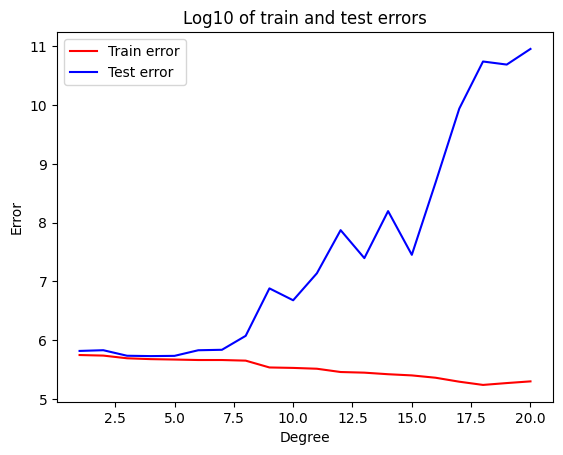

In [14]:
from sklearn.model_selection import train_test_split
from math import log
# Vaš kôd ovdje
deg = [x for x in range(1,21)]

X_tr_3, X_T_3, Y_tr_3, Y_T_3 = train_test_split(X, Y, train_size=0.5)
t_errs=[]
T_errs=[]

for d in deg:
    t = PolynomialFeatures(d)
    X_tr_t = t.fit_transform(X_tr_3)
    X_T_t = t.fit_transform(X_T_3)
    model = LinearRegression().fit(X_tr_t, Y_tr_3)
    
    h_tr = model.predict(X_tr_t)
    h_T = model.predict(X_T_t)

    print(f"For degree={d}:\nTrain:")
    tr_err = log10(modelErr(h_tr, Y_tr_3, True))
    print("Test:")
    T_err = log10(modelErr(h_T, Y_T_3, True))
    print("--------------------------")
    t_errs.append(tr_err)
    T_errs.append(T_err)

plt.plot(deg, t_errs, label="Train error", color="red")
plt.plot(deg, T_errs, label="Test error", color="blue")
plt.title("Log10 of train and test errors")

plt.ylabel("Error")
plt.xlabel("Degree")
plt.legend()
plt.show()


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

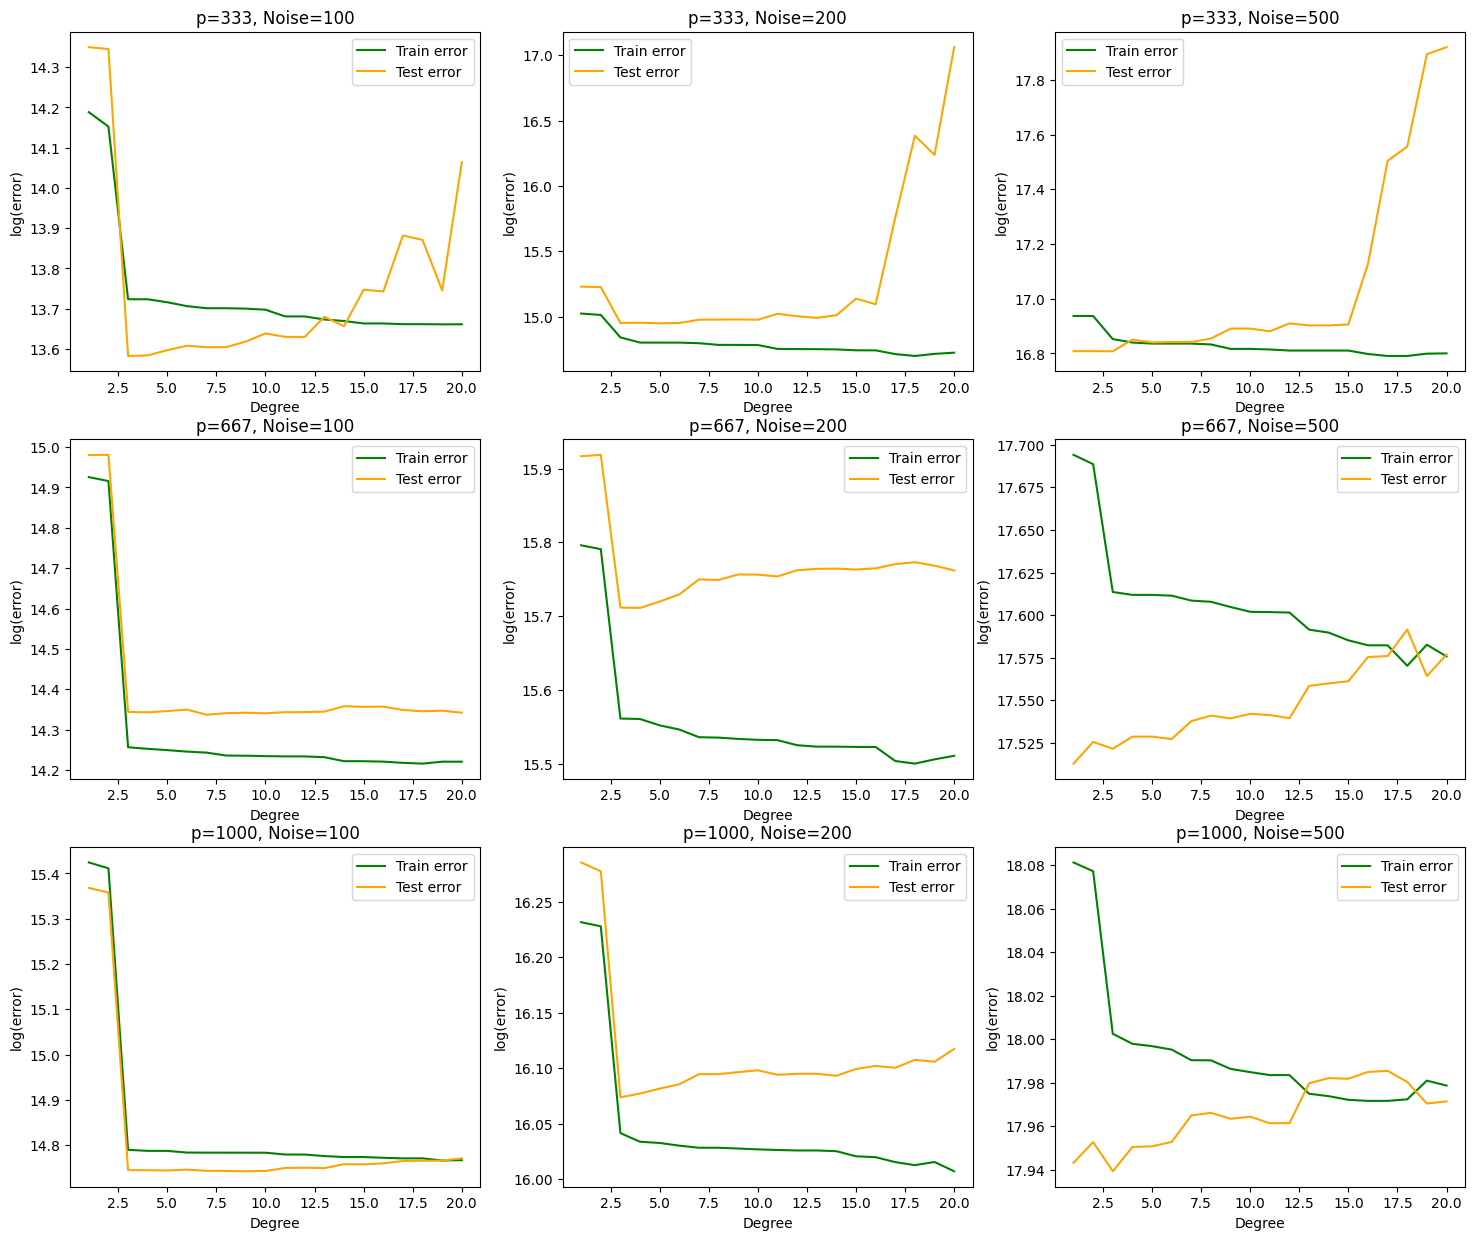

In [15]:
# Vaš kôd ovdje
import random as rnd
X = make_instances(-5, 5, 1000)
X_tr, X_T = train_test_split(X, train_size=.5)

noise = [100, 200, 500]
parts = [.3333, .6667, 1]
deg = [x for x in range(1,21)]

y_train = [make_labels(X_tr, lambda x: 5+ x - 2*(x**2) - 5*(x**3), n) for n in noise]
y_test = [make_labels(X_T, lambda x: 5+ x - 2*(x**2) - 5*(x**3), n) for n in noise]
indx = 1

plt.figure(figsize=(18, 15))
for p in parts:
    randIndexTrain = rnd.sample(range(0, len(X_tr)), round(len(X_tr)*p))
    randIndexTest = rnd.sample(range(0, len(X_T)), round(len(X_T)*p))
    X_tr_part = X_tr[randIndexTrain]
    X_T_part = X_T[randIndexTest]
    for i in range(3):
        y_train_part = [y_train[i][ind] for ind in randIndexTrain]
        y_test_part = [y_test[i][ind] for ind in randIndexTest]
        
        tr_errs, T_errs = [], []

        for d in deg:
            t = PolynomialFeatures(d)
            X_tr_poly = t.fit_transform(X_tr_part)
            X_T_poly = t.fit_transform(X_T_part)
            model = LinearRegression().fit(X_tr_poly, y_train_part)
            
            h_tr = model.predict(X_tr_poly)
            h_T = model.predict(X_T_poly)

            # print(f"For degree={d}:\nTrain:")
            tr_err = log(modelErr(h_tr, y_train_part))
            # print("Test:")
            T_err = log(modelErr(h_T, y_test_part))
            # print("--------------------------")
            tr_errs.append(tr_err)
            T_errs.append(T_err)
    
        # kod modidficiran sa https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
        # i prošlogodnišnjeg labosa
        ax = plt.subplot(3,3,indx+i)
        ax.set_title(f"p={round(p*1000)}, Noise={noise[i]}")
        ax.plot(deg, tr_errs, color="green", label="Train error")
        ax.plot(deg, T_errs, color="orange", label="Test error")
        ax.legend(loc="best")
        ax.set_xlabel("Degree")
        ax.set_ylabel("log(error)")
    indx += 3



***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
# Vaš kôd ovdje
regCoef = [0, 1 ,10]
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
fi_X = PolynomialFeatures(degree=3).fit_transform(X)

#print(linalg.inv(fi_X.T @ fi_X).shape)
for coef in regCoef:
    w_reg = linalg.inv(fi_X.T @ fi_X + coef*np.identity((fi_X.T @ fi_X).shape[0])) @ fi_X.T @ y
    print(f"Coef: {coef}\nw:\n{w_reg}\n-----------------------")


Coef: 0
w:
[ 4.         -5.91666667  3.375      -0.45833333]
-----------------------
Coef: 1
w:
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
-----------------------
Coef: 10
w:
[0.43312265 0.11060671 0.13827839 0.03093411]
-----------------------


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for coef in regCoef:
    mod = Ridge(coef, fit_intercept=False).fit(fi_X,y)
    print(f"Coef: {coef}\nw:\n{mod.coef_}\n-----------------------")

Coef: 0
w:
[ 4.         -5.91666667  3.375      -0.45833333]
-----------------------
Coef: 1
w:
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
-----------------------
Coef: 10
w:
[0.43312265 0.11060671 0.13827839 0.03093411]
-----------------------


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

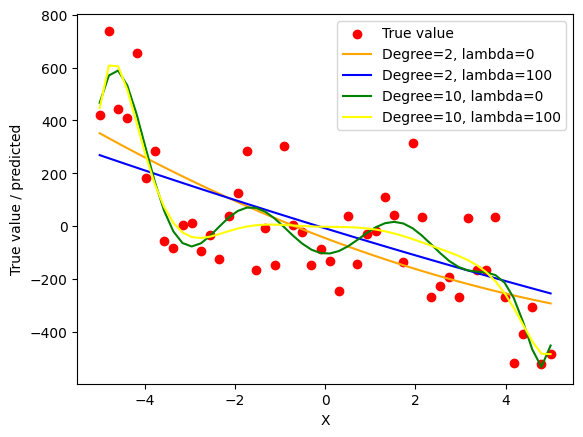

In [18]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 50)
y = make_labels(X,lambda x: 5+ x - 2*(x**2) - 5*(x**3), 200)

learn_fact = [0, 100]
degrees = [2, 10]
fi_2 = PolynomialFeatures(2, include_bias=True).fit_transform(X)
fi_10 = PolynomialFeatures(10, include_bias=True).fit_transform(X)

fi = [fi_2, fi_10]

# H_d_f gdje je d degree a f stupanj učenja
H_2_0=Ridge(0, fit_intercept=False).fit(fi_2,y)
H_2_100=Ridge(100, fit_intercept=False).fit(fi_2,y)
H_10_0=Ridge(0, fit_intercept=False).fit(fi_10,y)
H_10_100=Ridge(100, fit_intercept=False).fit(fi_10,y)

H = [H_2_0, H_2_100, H_10_0, H_10_100]
color = ["orange", "blue", "green", "yellow"]

plt.scatter(X, y, color="red", label="True value")
for i in range(2):
    for j in range(2):
        plt.plot(X, H[2*i+j].predict(fi[i]), color=color[2*i+j], label=f"Degree={degrees[i]}, lambda={learn_fact[j]}")

plt.xlabel("X")
plt.ylabel("True value / predicted")
plt.legend()
plt.show()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


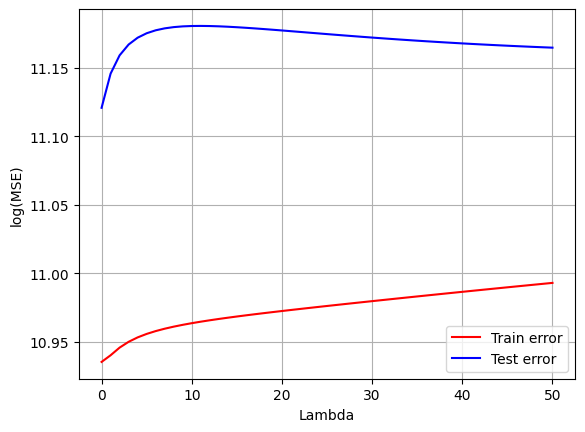

In [19]:
# Vaš kôd ovdje
X_train, X_test = train_test_split(X, train_size=0.5)
y_train, y_test = train_test_split(y, train_size=0.5)

testErr, trainErr = [], []
lando = [x for x in range(51)]

for l in lando:
    formator = PolynomialFeatures(10, include_bias=True)
    fi_train = formator.fit_transform(X_train)
    fi_test = formator.fit_transform(X_test)
    
    model = Ridge(l,fit_intercept=False)
    model.fit(fi_train, y_train)
    
    h_train = model.predict(fi_train)
    h_test = model.predict(fi_test)
    
    trainErr.append(mean_squared_error(y_train, h_train))
    testErr.append(mean_squared_error(y_test, h_test))

plt.plot(lando, np.log(trainErr), color="red", label="Train error")
plt.plot(lando, np.log(testErr), color="blue", label="Test error")
plt.xlabel("Lambda")
plt.ylabel("log(MSE)")
plt.legend()
plt.grid(True)
plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

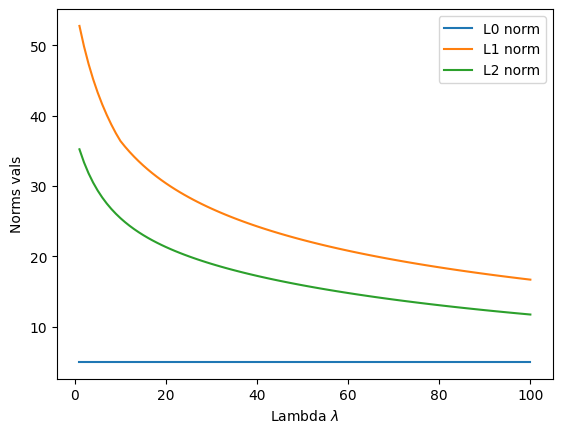

In [21]:
from sklearn.linear_model import Ridge
from math import sqrt
# Vaš kôd ovdje
lambdas = [x for x in range(1, 101)]
L_norms = [[], [], []]
Xtr = PolynomialFeatures(5).fit_transform(X_tr_3)
XT = PolynomialFeatures(5).fit_transform(X_T_3)

for l in lambdas:
    model = Ridge(alpha=l).fit(Xtr, Y_tr_3)
    w = model.coef_[1:]
    for i in range(3):
        if i ==0:
            L_norms[i].append(nonzeroes(w))
        elif i == 1:
            L_norms[i].append(sum(abs(w)))
        else:
            L_norms[i].append(sqrt(sum(pow(w, 2))))

plt.plot(lambdas, L_norms[0], label="L0 norm")
plt.plot(lambdas, L_norms[1], label="L1 norm")
plt.plot(lambdas, L_norms[2], label="L2 norm")
plt.xlabel(r"Lambda $\lambda$")
plt.ylabel("Norms vals")
plt.legend()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

/home/ante/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.233e+02, tolerance: 1.733e+02
  model = cd_fast.enet_coordinate_descent(


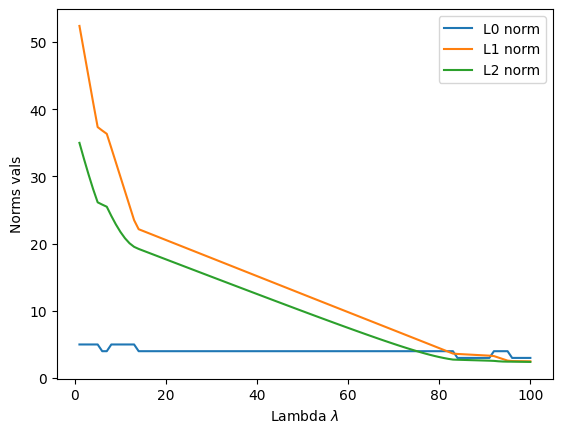

In [22]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
lambdas = [x for x in range(1, 101)]
L_norms = [[], [], []]

for l in lambdas:
    model = Lasso(alpha=l).fit(Xtr, Y_tr_3)
    w = model.coef_[1:]
    for i in range(3):
        if i ==0:
            L_norms[i].append(nonzeroes(w))
        elif i == 1:
            L_norms[i].append(sum(abs(w)))
        else:
            L_norms[i].append(sqrt(sum(pow(w, 2))))

plt.plot(lambdas, L_norms[0], label="L0 norm")
plt.plot(lambdas, L_norms[1], label="L1 norm")
plt.plot(lambdas, L_norms[2], label="L2 norm")
plt.xlabel(r"Lambda $\lambda$")
plt.ylabel("Norms vals")
plt.legend()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

Text(0, 0.5, 'Y_grade')

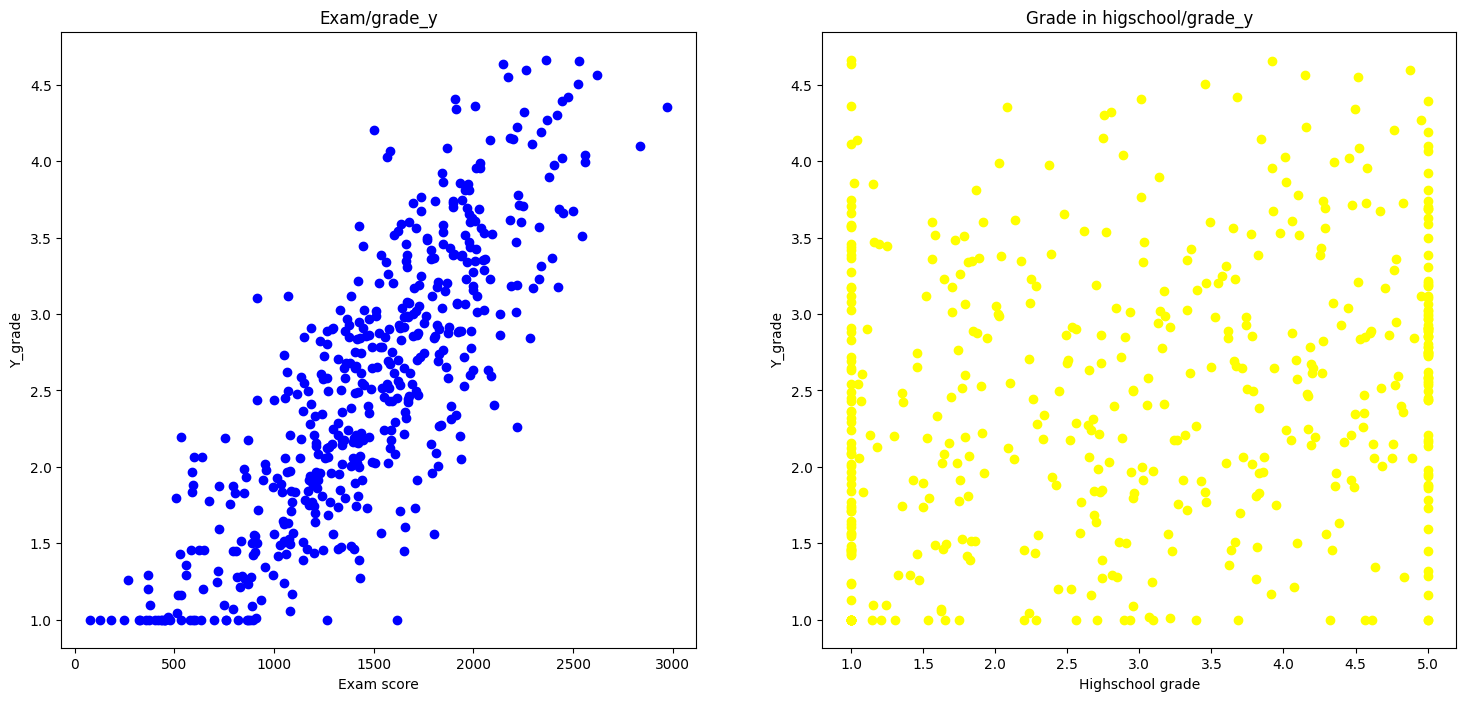

In [24]:
# Vaš kôd ovdje

from numpy import sort


plt.figure(figsize=(18, 8))


ax = plt.subplot(1,2,1)
ax.set_title("Exam/grade_y")
ax.scatter(exam_score, grades_y, color="blue")
ax.set_xlabel("Exam score")
ax.set_ylabel("Y_grade")

ax = plt.subplot(1,2,2)
ax.set_title("Grade in higschool/grade_y")
ax.scatter(grade_in_highschool, grades_y, color="yellow")
ax.set_xlabel("Highschool grade")
ax.set_ylabel("Y_grade")



### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
# Vaš kôd ovdje
model = Ridge(0.01).fit(grades_X, grades_y)
w = model.coef_
bias = model.intercept_

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [26]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
grades_X_fixed = StandardScaler().fit_transform(grades_X)
grades_y_fixed = StandardScaler().fit_transform(grades_y.reshape(-1,1))

model6 = Ridge(0.01).fit(grades_X_fixed, grades_y_fixed)

print(f"w_unscaled:\t{w}\nw_scaled:\t{model6.coef_}\nBias_unscaled:\t{bias}\nBias_scaled:\t{model6.intercept_}")

w_unscaled:	[0.00141497 0.09477276]
w_scaled:	[0.81630375 0.15167761]
Bias_unscaled:	0.15061179575776018
Bias_scaled:	[8.62551331e-17]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
# Vaš kôd ovdje
lastcol = np.array([x[1] for x in grades_X_fixed]).reshape(-1,1)
grades_X_fixed_colinear = np.hstack([grades_X_fixed, lastcol])
print(grades_X_fixed_colinear)


[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
# Vaš kôd ovdje
model = Ridge(0.01).fit(grades_X_fixed_colinear, grades_y_fixed)
w_col = model.coef_
bias_col = model.intercept_

print(f"w_unscaled:\t{w_col}\nw_scaled:\t{model6.coef_}\nBias_unscaled:\t{bias_col}\nBias_scaled:\t{model6.intercept_}")

w_unscaled:	[0.81630364 0.07583957 0.07583957]
w_scaled:	[0.81630375 0.15167761]
Bias_unscaled:	[8.6255971e-17]
Bias_scaled:	[8.62551331e-17]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
# Vaš kôd ovdje
import random
w_01s = []
w_1000s = []
for i in range(10):
    print(f"Instance{i}")
    model01 = Ridge(0.01, fit_intercept=False)
    model1000= Ridge(1000, fit_intercept=False)
    
    randIndexTrain = random.sample(range(0, len(grades_X_fixed_colinear)), round(len(grades_X_fixed_colinear)*0.5))

    grades_X_part = grades_X_fixed_colinear[randIndexTrain]
    grades_y_part = [grades_y_fixed[ind] for ind in randIndexTrain]
    model01.fit(grades_X_part, grades_y_part)
    h = model01.predict(grades_X_part)
    print("lambda=0.01")
    print(f"W=\n{model01.coef_}")
    w_01s.append(model01.coef_)
    #print(f"MSE=\t{mean_squared_error(grades_y_part, h)}")
    print("-----")
    model1000.fit(grades_X_part, grades_y_part)
    h = model1000.predict(grades_X_part)
    print("lambda=1000")
    print(f"W=\n{model1000.coef_}")
    w_1000s.append(model1000.coef_)
    #print(f"MSE=\t{mean_squared_error(grades_y_part, h)}")
    print("______________________________________________________________")

print(r"For lambda=0.01")
print(f"Mean: {np.mean(w_01s)}\tSTD: {np.std(w_01s)}\n")

print(r"For lambda=1000")
print(f"Mean: {np.mean(w_1000s)}\tSTD: {np.std(w_1000s)}")

Instance0
lambda=0.01
W=
[0.79120194 0.0799294  0.0799294 ]
-----
lambda=1000
W=
[0.1666961 0.0407637 0.0407637]
______________________________________________________________
Instance1
lambda=0.01
W=
[0.80918205 0.07371507 0.07371507]
-----
lambda=1000
W=
[0.16176283 0.02768559 0.02768559]
______________________________________________________________
Instance2
lambda=0.01
W=
[0.84633132 0.06654979 0.06654979]
-----
lambda=1000
W=
[0.16784148 0.02846918 0.02846918]
______________________________________________________________
Instance3
lambda=0.01
W=
[0.81286563 0.07403221 0.07403221]
-----
lambda=1000
W=
[0.14429089 0.02673852 0.02673852]
______________________________________________________________
Instance4
lambda=0.01
W=
[0.84116675 0.0815496  0.0815496 ]
-----
lambda=1000
W=
[0.1593828  0.04171058 0.04171058]
______________________________________________________________
Instance5
lambda=0.01
W=
[0.82393907 0.07151394 0.07151394]
-----
lambda=1000
W=
[0.17012479 0.02929109 0.02

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.